## Supervised Learning - Building a Student Performance Classification System


#### The aim of this project is to predict how likely a student is to pass. 

This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Drop missing values.

4.Transform Data

5.Drop variables with less variance

6.Encode all categorical variables to numerical

7.Convert the continuous values of grades into classes

8.Apply the models.

9.Visualization

10.Provide insights.

11.Training and testing data split

12.Model Implementation and Testing the Accuracy

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Exploring the Data

## Question 1 - Read Dataset, Print Columns and Drop missing values


#### Answer:

#In case you are working in Google Colab, Upload the csv file to colab.
from google.colab import files

uploaded = files.upload()

In [76]:
# Read dataset using pandas and print few rows
# Hint: Read the dataset file using pandas.read_csv(). Take care about the delimiter.
df = pd.read_csv("C:\\Users\\srivi\\Downloads\\students-data.csv",sep=';')

In [77]:
# Print the columns in the dataframe
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [78]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [79]:
df.shape

(395, 33)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [81]:
df.isnull().sum().any()

False

# Insight:
There are no missing values

In [82]:
# Drop missing values
# Hint: Set the index name of the dataframe to "number". Check sample of data to drop if any missing values are there
df.index.name='number'

In [83]:
df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


## Transform Data

## Question 2 - Print all the attribute names which are not numerical.

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [84]:
print(df.select_dtypes(include='object').columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Question 3 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [85]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [86]:
for i in df.select_dtypes(include=['number']).columns:
    if df[i].var() < 1:
        df.drop(i,axis=1,inplace=True)

In [87]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [88]:
df.shape

(395, 27)

# Insight:
This is because we can avoid the variables those distributions overlap to improve R2. More no. of features will
anyway increase the R2 but it might not be right.

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [90]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [91]:

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        #df=df.apply(LabelEncoder().fit_transform) #this is wrong because it will encode including numeric variables
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

df.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


In [92]:
#df.columns.value_counts()

In [93]:
#L = df.select_dtypes(include='object').columns
#df.apply(lambda x: class_le.fit_transform(x) if (x.name in L) else x)


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [94]:
for col in ['G1','G2','G3']:
     df[col] = df[col].apply(lambda x: 1 if (x>=10) else 0)
     #df[col]=np.where(df[i]>=10,1,0) can use this syntax too


In [95]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


In [96]:
#for col in ['G1','G2','G3']:
#     df[col] = df[col].applymap(x<10,0,1)

## Apply the models.

## Question 6 - Separate Feature and Target
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [97]:
# Target values are G3

# Feature set is remaining features
X=df.drop('G3',axis=1)
y=df['G3']

In [98]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [99]:
print(X.shape)
print(y.shape)

(395, 26)
(395,)


## Visualization

## Question 7 - Plot G2 and G3 and give your understanding on relation between both variables.

* Hint:Bar plot to compare counts of '0' and '1' in G2 and G3

In [100]:
import seaborn as sns
#ax = sns.barplot(x="G2", y="age", data=df)

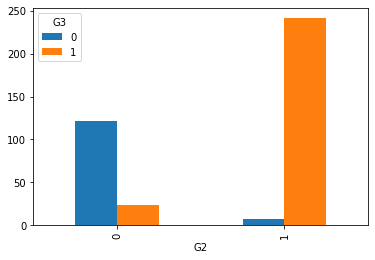

In [101]:
#sns.countplot(x="G2", hue="G3", data=df) can use this too
pd.crosstab(df.G2,df.G3).plot(kind='bar')

In [102]:
pd.crosstab(df.G2,df.G3)

G3,0,1
G2,,
0,122,24
1,8,241


# Insight:
From the plot we see that is student pass in G2 then he is most likely to pass in G3 so it is a good predictor variable


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8 - Plot the number of students in each school and number of students with different ages in separate plots.

* Hint: Bar plots using unique value counts

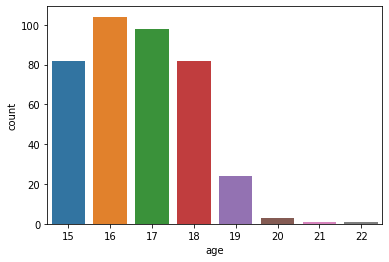

In [103]:
sns.countplot(x='age',data=df)

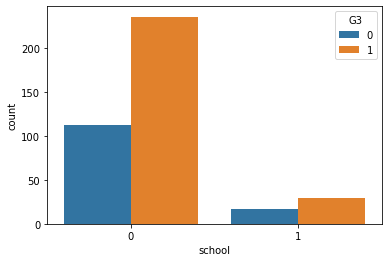

In [104]:
sns.countplot(x='school',data=df,hue='G3')

## Question 9 - Training and Testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [105]:
from sklearn.model_selection import  train_test_split
# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = 95

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, train_size=num_train, random_state=42)


# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))




Training set has 300 samples.
Testing set has 95 samples.


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression, Naive Bayes and KNN** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [107]:
from sklearn.metrics import classification_report

In [108]:
import warnings
warnings.filterwarnings('ignore')


Logistic Regression

In [109]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict1=lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
print(classification_report(y_test,y_predict1))

0.9266666666666666
0.9157894736842105
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.96      0.90      0.93        60

    accuracy                           0.92        95
   macro avg       0.91      0.92      0.91        95
weighted avg       0.92      0.92      0.92        95



Naive Bayes Classifier

In [110]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_predict2=nb.predict(X_test)
print(nb.score(X_train,y_train))
print(nb.score(X_test,y_test))
print(classification_report(y_test,y_predict2))

0.8966666666666666
0.9157894736842105
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        35
           1       0.98      0.88      0.93        60

    accuracy                           0.92        95
   macro avg       0.91      0.93      0.91        95
weighted avg       0.93      0.92      0.92        95



K-neighbours Classifier

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_predict3=knn.predict(X_test)

print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))
print(classification_report(y_test,y_predict3))

0.8133333333333334
0.7263157894736842
              precision    recall  f1-score   support

           0       0.85      0.31      0.46        35
           1       0.71      0.97      0.82        60

    accuracy                           0.73        95
   macro avg       0.78      0.64      0.64        95
weighted avg       0.76      0.73      0.68        95



# Insight:
From the F1 score of three classifiers we can see that (no tuning applied), performance of knn is less than the others.